## Are there any connections between the number of LEGO sets produced for a particular franchise and the number of movies produced in the same franchise? For example, are there more LEGO sets produced for Marvel movies compared to DC Comics movies?

## Initial Assumptions

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


pd.set_option('display.max_rows', 1000)

In [52]:
# Import Individual Lego DataFrames
sets = pd.read_csv("data/sets.csv.gz")
themes = pd.read_csv("data/themes.csv.gz")

# Import Box Office Data
box_office_numbers = pd.read_csv("data/boxofficemojotopfranchises.tsv", sep= "\t")

imdb_titles = pd.read_csv("data/title.basics.tsv.gz", sep= "\t")

/var/folders/f1/vcc52pv15lz1xrwzg4bzd4rm0000gn/T/ipykernel_43516/3531155298.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv("data/title.basics.tsv.gz", sep= "\t")


In [53]:
# Clean Up the IMDB dataset
imdb_titles.replace('\\N', np.nan, inplace=True)
imdb_titles.dropna(subset=["startYear","titleType","primaryTitle", "runtimeMinutes"], inplace=True)
# Filter start year for lego data sets
imdb_titles["startYear"] = imdb_titles["startYear"].astype(int)
imdb_titles = imdb_titles[(imdb_titles["startYear"] >= 1950) & (imdb_titles["startYear"] <= 2022)]
# Filter to only Movies 
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
# Filter out short films
# imdb_titles["runtimeMinutes"] = imdb_titles["runtimeMinutes"].astype(int)
# imdb_titles = imdb_titles[imdb_titles["runtimeMinutes"]>=60]

In [54]:
# Clean Up lego Data Sets
# filter to appropriate years
sets = sets.loc[sets.year <= 2022]
# Merging Sets and Themes to look at most common themes over time
sets_and_themes_df = sets.merge(themes, left_on="theme_id", right_on="id", how='left', suffixes=('_set', "_theme"))
sets_and_themes_df = sets_and_themes_df.loc[sets_and_themes_df.year <= 2022]
# Cleaning Sets and Themes by populating parent theme
sets_and_themes_df.parent_id = sets_and_themes_df.parent_id.fillna(sets_and_themes_df.id)
id_themes = sets_and_themes_df[["id","name_theme"]].drop_duplicates()
sets_and_themes_df = sets_and_themes_df.merge(id_themes, left_on="parent_id", right_on="id", how="left", suffixes=("","_parent"))
sets_and_themes_df.drop(columns=["id_parent"],inplace=True)
sets_and_themes_df.rename(columns={"name_theme_parent":"parent_theme"}, inplace=True)

sets_and_themes_df["parent_theme"] = sets_and_themes_df["parent_theme"].fillna("")
marvel_sets = sets_and_themes_df[sets_and_themes_df["parent_theme"].str.contains("Disney")]
print(marvel_sets.head(100))

# Handling Nulls in the Parent Theme Name Columns
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 147, "parent_theme"] = "Pirates I, Pirates II, Pirates III"
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 296, "parent_theme"] = "Dino Island, Desert, Orient Expedition, Jungle"
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 561, "parent_theme"] = "The Lord of the Rings, The Hobbit"

       set_num                                      name_set  year  theme_id  \
657    10772-1                Mickey Mouse's Propeller Plane  2021       608   
658    10773-1                 Minnie Mouse's Ice Cream Shop  2021       608   
659    10774-1    Mickey Mouse & Minnie Mouse's Space Rocket  2021       608   
660    10775-1             Mickey Mouse & Donald Duck's Farm  2021       608   
661    10776-1         Mickey & Friends Fire Truck & Station  2021       608   
662    10777-1              Mickey and Minnie's Camping Trip  2022       608   
663    10778-1     Mickey, Minnie and Goofy's Fairground Fun  2022       608   
664    10780-1           Mickey and Friends Castle Defenders  2022       608   
3496   30116-1                       Rapunzel's Market Visit  2014       579   
3548  302001-1                                        Aurora  2020       579   
3549  302002-1                               Aurora's Rabbit  2020       579   
3550  302003-1                          

In [55]:
# Define the list of franchises we want to analyze
franchises = ["Star Wars", "Harry Potter","Super Heroes Marvel","Disney Princess","Super Heroes DC", "Jurassic World", "Batman", "The Hobbit/The Lord of the Rings", "Indiana Jones", "Pirates Of The Caribean", "Minions", "Trolls"]

# Count the number of LEGO sets for each franchise
sets_by_franchise = sets_and_themes_df.loc[sets_and_themes_df.parent_theme.isin(franchises)]
sets_by_franchise = sets_by_franchise.groupby("parent_theme").size().reset_index(name="num_sets")

# Count the number of movies for each franchise
#movies_by_franchise = imdb_titles.loc[imdb_titles.primaryTitle.str.contains('|'.join(franchises), case=False)]
#movies_by_franchise = movies_by_franchise.groupby("primaryTitle").size().reset_index(name="num_movies")
#movies_by_franchise = movies_by_franchise.replace(to_replace=franchises, value=franchises)


In [56]:
# Generated dictionary of theme and blockbuster movie to pass for interactive plotting

#Lego Movie
#Marvel Movies
#DC Movies
#Disney Princess 
franchise_dict = {"Star Wars": {"title":"Star Wars","regex": r'\bstar wars\b', 
                               "movies": ["Star Wars: Episode IV - A New Hope", 
                                          "Star Wars: Episode V - The Empire Strikes Back", 
                                          "Star Wars: Episode VI - Return of the Jedi", 
                                          "Star Wars: Episode I - The Phantom Menace",
                                          "Star Wars: Episode II - Attack of the Clones",
                                          "Star Wars: Episode III - Revenge of the Sith",
                                          "Star Wars: Episode VII - The Force Awakens",
                                          "Star Wars: Episode VIII - The Last Jedi",
                                          "Star Wars: Episode IX - The Rise of Skywalker",
                                          "Solo: A Star Wars Story",
                                          "Rogue One: A Star Wars Story",
                                          "Solo: A Star Wars Story"]},
                  "Harry Potter": {"title":"Harry Potter","regex": r'\bharry potter\b', 
                                  "movies":["Harry Potter and the Sorcerer's Stone",
                                            "Harry Potter and the Chamber of Secrets",
                                            "Harry Potter and the Prisoner of Azkaban",
                                            "Harry Potter and the Goblet of Fire",
                                            "Harry Potter and the Order of the Phoenix",
                                            "Harry Potter and the Half-Blood Prince",
                                            "Harry Potter and the Deathly Hallows: Part 1",
                                            "Harry Potter and the Deathly Hallows: Part 2"]},
                 "Jurassic Park": {"title":"Jurassic Park","regex": r'\bJurassic\b', 
                                  "movies": ["Jurassic Park", 
                                             "The Lost World: Jurassic Park", 
                                             "Jurassic Park III", 
                                             "Jurassic World", 
                                             "Jurassic World: Fallen Kingdom", 
                                             "Jurassic World: Dominion"]},
                  "Batman": {"title":"Batman","regex": r'\bbatman\b', 
                                  "movies": ["Batman: The Movie",
                                             "Batman",
                                             "Batman Returns",
                                             "Batman: Mask of the Phantasm",
                                             "Batman Forever",
                                             "Batman & Robin",
                                             "Batman Begins",
                                             "The Dark Knight",
                                             "The Dark Knight Rises",
                                             "Batman v Superman: Dawn of Justice",
                                             "The Lego Batman Movie",
                                             "The Batman"]},
                 "Lord of the Rings": {"title":"Lord of the Rings","regex": r'\bLord of the Rings\b', 
                                       "movies": ["The Hobbit: An Unexpected Journey",
                                                  "The Hobbit: The Desolation of Smaug",
                                                  "The Hobbit: The Battle of the Five Armies",
                                                  "The Lord of the Rings: The Fellowship of the Ring",
                                                  "The Lord of the Rings: The Two Towers",
                                                  "The Lord of the Rings: The Return of the King"]},
                  "Indiana Jones": {"title":"Indiana Jones","regex": r'\bIndiana Jones\b', 
                                    "movies": ["Raiders of the Lost Ark",
                                               "Indiana Jones and the Temple of Doom",
                                               "Indiana Jones and the Last Crusade",
                                               "Indiana Jones and the Kingdom of the Crystal Skull"]},
                 "Pirates of the Caribbean": {"title":"Pirates of the Caribbean","regex": r'\bPirates of the Caribbean\b',
                                              "movies": ["Pirates of the Caribbean: The Curse of the Black Pearl",
                                                         "Pirates of the Caribbean: Dead Man's Chest",
                                                         "Pirates of the Caribbean: At World's End",
                                                         "Pirates of the Caribbean: On Stranger Tides",
                                                         "Pirates of the Caribbean: Dead Men Tell No Tales"]},
                 "Minions": {"title":"Minions","regex": r'\bMinions\b',
                             "movies": ["Minions",
                                        "Minions: The Rise of Gru"]},
                 "Trolls": {"title":"Trolls","regex": r'\bTrolls\b',
                            "movies": ["Trolls",
                                       "Trolls 2: World Tour"]},
                 "Marvel Cinematic Universe": {"title": "Super Heroes Marvel", "regex": r'\bmarvel(?!.*dc)\b', 
                             "movies": ["Iron Man", 
                                        "The Incredible Hulk", 
                                        "Iron Man 2", 
                                        "Thor", 
                                        "Captain America: The First Avenger", 
                                        "Marvel's The Avengers", 
                                        "Iron Man 3", 
                                        "Thor: The Dark World", 
                                        "Captain America: The Winter Soldier", 
                                        "Guardians of the Galaxy", 
                                        "Avengers: Age of Ultron", 
                                        "Ant-Man", 
                                        "Captain America: Civil War", 
                                        "Doctor Strange", 
                                        "Guardians of the Galaxy Vol. 2", 
                                        "Spider-Man: Homecoming", 
                                        "Thor: Ragnarok", 
                                        "Black Panther", 
                                        "Avengers: Infinity War", 
                                        "Ant-Man and The Wasp", 
                                        "Captain Marvel", 
                                        "Avengers: Endgame", 
                                        "Spider-Man: Far From Home"]},
                 "DC Universe": {"title":"Super Heroes DC","regex": r'\bdc\b|\bdceu\b|\bdc extended universe\b', 
                "movies": ["Man of Steel",
                           "Batman v Superman: Dawn of Justice",
                           "Suicide Squad",
                           "Wonder Woman",
                           "Justice League",
                           "Aquaman",
                           "Shazam!",
                           "Batman",
                           "Birds of Prey",
                           "Wonder Woman 1984",
                           "The Suicide Squad",
                           "Black Adam"]},
                 "Disney Princess": {"title":"Disney Princess","regex": r'\b(disney )?princess(es)?\b', 
                                      "movies": ["Snow White and the Seven Dwarfs",
                                                 "Cinderella",
                                                 "Sleeping Beauty",
                                                 "The Little Mermaid",
                                                 "Beauty and the Beast",
                                                 "Aladdin",
                                                 "Pocahontas",
                                                 "Mulan",
                                                 "The Princess and the Frog",
                                                 "Tangled",
                                                 "Brave",
                                                 "Frozen",
                                                 "Moana",
                                                 "Raya and the Last Dragon"]}}

# Define a function to extract the franchise name from the movie title
def get_franchise_name(title):
    for franchise_name, franchise_info in franchise_dict.items():
        if any(re.search(movie_title, title, re.IGNORECASE) for movie_title in franchise_info["movies"]):
            return franchise_info["title"]
    return None

# Create a new column in the imdb_titles DataFrame with the franchise name for each movie
imdb_titles["franchise"] = imdb_titles["primaryTitle"].apply(get_franchise_name)
imdb_titles = imdb_titles.groupby("franchise").size().reset_index(name="num_movies")
print(imdb_titles.head(1000))

                   franchise  num_movies
0                     Batman          61
1            Disney Princess         399
2               Harry Potter           8
3              Indiana Jones           4
4              Jurassic Park           7
5          Lord of the Rings           6
6                    Minions           5
7   Pirates of the Caribbean           5
8                  Star Wars          11
9            Super Heroes DC          30
10       Super Heroes Marvel         199
11                    Trolls          11


          parent_theme  num_sets            franchise  num_movies
0               Batman        49               Batman          61
1      Disney Princess        80      Disney Princess         399
2         Harry Potter       134         Harry Potter           8
3        Indiana Jones        20        Indiana Jones           4
4              Minions         9              Minions           5
5            Star Wars       889            Star Wars          11
6      Super Heroes DC       164      Super Heroes DC          30
7  Super Heroes Marvel       258  Super Heroes Marvel         199


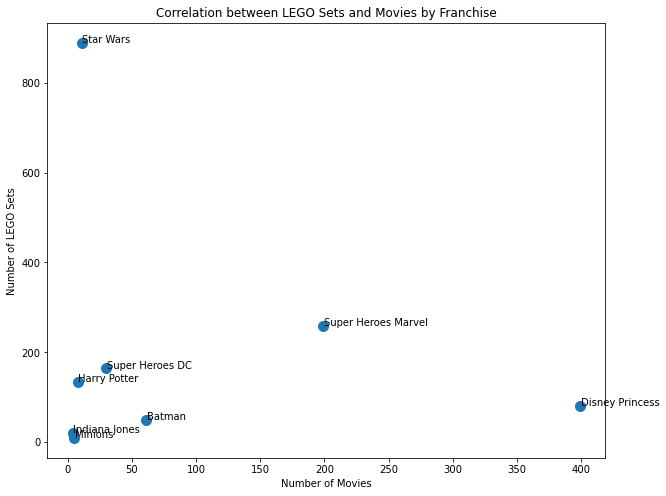

In [57]:
# Merge the sets and movies dataframes on the franchise column

franchise_data = pd.merge(sets_by_franchise, imdb_titles, left_on="parent_theme", right_on="franchise")
franchise_data.fillna(0, inplace=True)
print(franchise_data)
# Create a scatter plot of number of LEGO sets vs. number of movies for each franchise
plt.figure(figsize=(10, 8))
plt.scatter(franchise_data.num_movies, franchise_data.num_sets, s=100)
plt.xlabel("Number of Movies")
plt.ylabel("Number of LEGO Sets")
plt.title("Correlation between LEGO Sets and Movies by Franchise")
for i, txt in enumerate(franchise_data.parent_theme):
    plt.annotate(txt, (franchise_data.num_movies[i]+0.5, franchise_data.num_sets[i]), fontsize=10)
plt.show()